In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import umap

In [2]:
# Load learned embeddings
embeddings = np.load("../data/processed/fighter_embeddings.npy")

# Load cleaned fighter data for names & stats
df = pd.read_csv("../data/processed/fighters_clean.csv")

In [3]:
embeddings.shape

(4451, 8)

In [4]:
df.shape

(4451, 13)

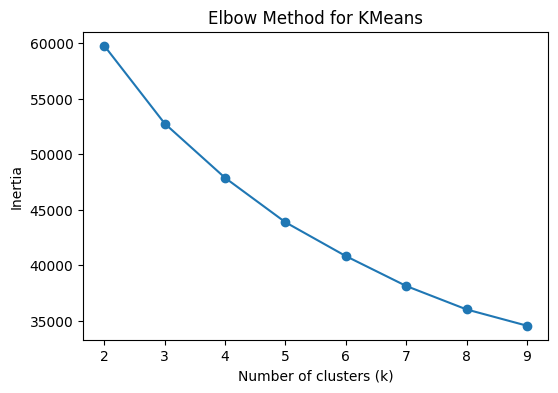

In [5]:
# Decide Number of Clusters (k)

# Elbow Method

inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(embeddings)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(2,10), inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

In [6]:
# Apply KMeans Clustering

k = 4

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)

df["cluster"] = clusters

In [7]:
# Cluster Profiling

cluster_profile = df.groupby("cluster")[
    [
        "SLpM", "SApM", "Str_Acc", "TD_Avg",
        "TD_Acc", "Sub_Avg", "Win_Ratio"
    ]
].mean()

cluster_profile

,SLpM,SApM,Str_Acc,TD_Avg,TD_Acc,Sub_Avg,Win_Ratio
cluster,,,,,,,
0,3.092569,4.247815,0.425312,0.737551,0.180384,0.349940,0.708735
1,4.234803,4.367672,0.452463,1.448842,0.306318,0.442734,0.743523
2,0.175481,1.014582,0.060804,0.016720,0.001958,0.086667,0.522595
3,2.356625,2.656294,0.447860,3.029319,0.578638,1.470039,0.672605


In [8]:
# PCA Visualization

pca = PCA(n_components=2)
emb_pca = pca.fit_transform(embeddings)

df["pca_1"] = emb_pca[:, 0]
df["pca_2"] = emb_pca[:, 1]

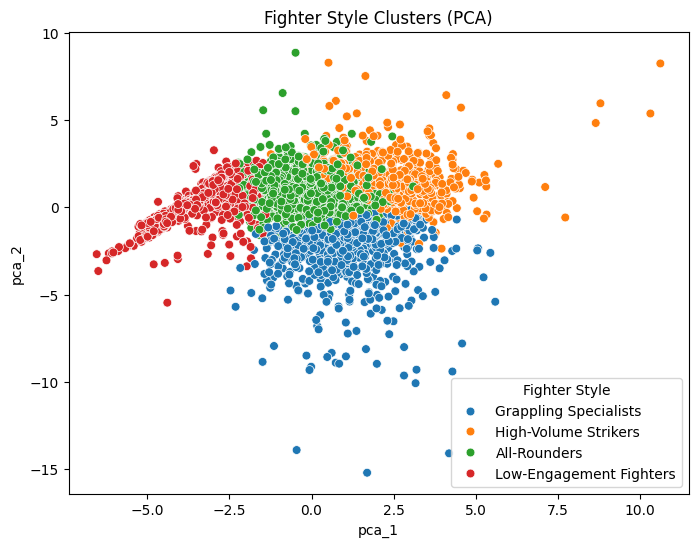

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="pca_1",
    y="pca_2",
    hue="cluster_label",
    palette="tab10",
    s=40
)
plt.title("Fighter Style Clusters (PCA)")
plt.legend(title="Fighter Style")
plt.show()

In [10]:
# UMAP Visualization

reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=15,
    min_dist=0.1
)

emb_umap = reducer.fit_transform(embeddings)

df["umap_1"] = emb_umap[:, 0]
df["umap_2"] = emb_umap[:, 1]

c:\DS_Projects\fighter-style-embeddin\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


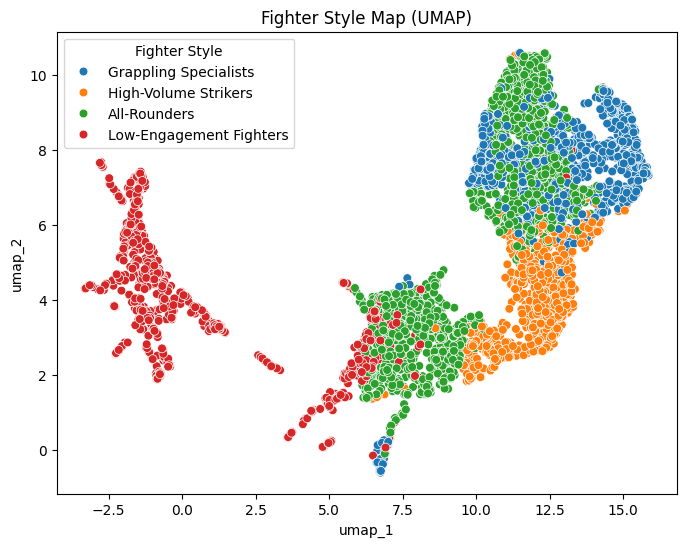

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="umap_1",
    y="umap_2",
    hue="cluster_label",
    palette="tab10",
    s=40
)
plt.title("Fighter Style Map (UMAP)")
plt.legend(title="Fighter Style")
plt.show()

In [13]:
# Inspect Fighters per Cluster

for c in range(k):
    print(f"\nCluster {c}")
    display(
        df[df["cluster"] == c][
            ["SLpM", "TD_Avg", "Sub_Avg", "Win_Ratio"]
        ].head(10)
    )


Cluster 0


,SLpM,TD_Avg,Sub_Avg,Win_Ratio
2,5.67,0.51,0.3,0.708333
3,3.88,1.54,0.1,0.750000
6,1.50,0.00,0.0,0.500000
10,5.46,0.00,0.5,0.653846
14,2.54,3.29,0.0,0.708333
16,2.76,1.32,1.0,0.625000
17,4.33,1.05,0.3,0.769231
23,2.58,0.00,0.0,0.684211
24,4.22,0.00,0.5,0.687500
26,1.65,1.65,0.0,0.705882



Cluster 1


,SLpM,TD_Avg,Sub_Avg,Win_Ratio
1,6.23,1.50,0.0,0.850000
9,4.51,2.96,0.9,0.736842
13,3.83,1.79,0.2,0.608696
22,4.85,1.09,0.4,0.761905
31,5.71,0.84,0.0,0.812500
33,1.21,0.00,0.0,0.750000
35,3.56,0.78,1.6,0.551724
40,3.33,0.00,0.0,0.750000
61,4.46,0.56,0.0,0.675676
65,2.97,1.02,0.3,0.523810



Cluster 2


,SLpM,TD_Avg,Sub_Avg,Win_Ratio
5,0.00,0.0,0.0,0.700000
7,0.00,0.0,0.0,0.611111
12,0.00,0.0,0.0,0.355932
15,0.00,0.0,0.0,0.625000
19,0.00,0.0,0.0,0.750000
20,0.00,0.0,0.0,0.500000
21,0.92,0.0,0.0,0.545455
28,1.15,0.0,0.0,0.342105
41,0.89,0.0,0.0,0.636364
48,0.00,0.0,0.0,0.571429



Cluster 3


,SLpM,TD_Avg,Sub_Avg,Win_Ratio
0,2.83,1.20,1.0,0.666667
4,3.49,3.83,0.3,0.692308
8,2.04,1.80,0.0,0.500000
11,1.90,5.43,2.0,0.933333
18,1.87,1.06,2.6,0.716981
25,1.54,2.71,0.0,0.545455
29,3.11,5.82,0.7,0.823529
32,1.62,2.12,5.3,0.500000
39,1.53,2.18,3.3,0.690909
42,2.32,2.95,0.0,0.608696


In [ ]:
# Cluster Labels

cluster_labels = {
    0: "All-Rounders",
    1: "High-Volume Strikers",
    2: "Low-Engagement Fighters",
    3: "Grappling Specialists"
}

df["cluster_label"] = df["cluster"].map(cluster_labels)